In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing
#Load dataset
data = pd.read_csv(r"/content/sample_data/@customer_shopping_data.csv")

# **#Taking a look at top 5 rows of the data.**

In [3]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,08-05-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11-09-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon


# **#Display basic information about the dataset.**

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


# **#Display summary statistics**

In [4]:
print(data.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [5]:
data.shape

(99457, 10)

In [6]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [7]:
data.isnull()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


# **#missing values checking**

In [8]:
print("\nMissing values handling")
cl = data.isna().any()
print(cl)


Missing values handling
invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool


In [9]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99452,False
99453,False
99454,False
99455,False


In [10]:
data.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [2]:
data.dtypes

,0
invoice_no,object
customer_id,object
gender,object
age,int64
category,object
quantity,int64
price,float64
payment_method,object
invoice_date,object
shopping_mall,object


#**Calculate Average Purchase Value**

In [15]:
average_purchase_value = data.groupby('customer_id')['quantity'].mean()
print("Average Purchase Value:\n", average_purchase_value)

# Assuming 'data' is the DataFrame containing your dataset
# Ensure 'invoice_date' is in datetime format
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='dayfirst')

# Calculate the number of orders per customer
order_frequency = data.groupby('customer_id')['invoice_no'].nunique()

# Calculate the average time between orders for each customer
purchase_frequency = data.groupby('customer_id')['invoice_date'].apply(lambda x: x.sort_values().diff().mean())

# Combine order frequency and purchase frequency into a single DataFrame for easy analysis
purchase_data = pd.DataFrame({
    'order_frequency': order_frequency,

})



Average Purchase Value:
 customer_id
C100004    5.0
C100005    2.0
C100006    3.0
C100012    5.0
C100019    1.0
          ... 
C999886    3.0
C999910    3.0
C999974    5.0
C999976    3.0
C999995    2.0
Name: quantity, Length: 99457, dtype: float64


# #**Visualization**

<ipython-input-59-2c3240a372e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='price',palette='viridis', data=data, estimator=np.mean)


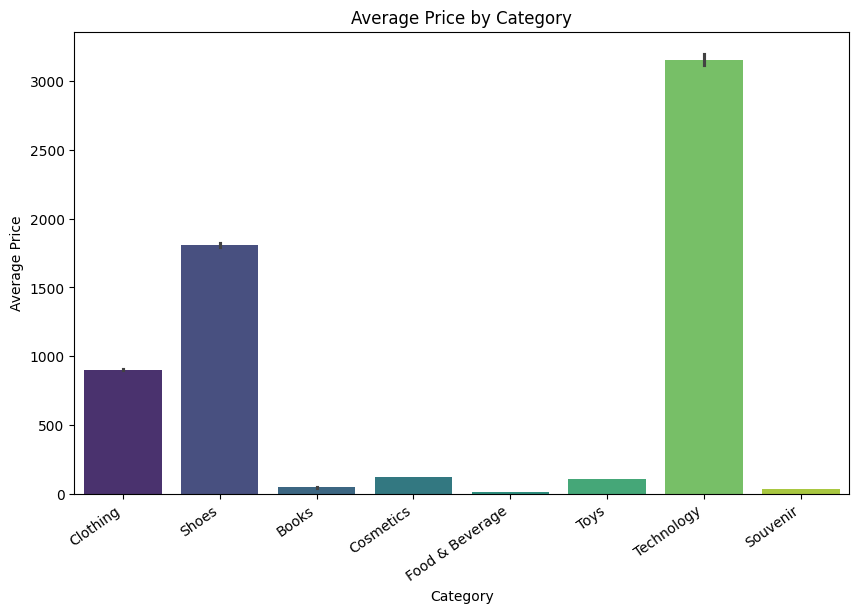

In [59]:
# Average price by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='price',palette='viridis', data=data, estimator=np.mean)
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=35, ha='right')
plt.show()

<ipython-input-73-6acbb86fafb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method',palette='viridis', data=data)


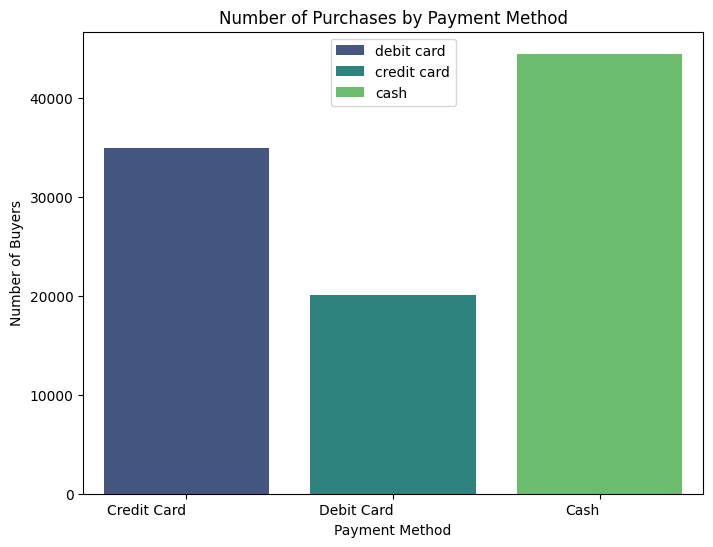

In [73]:
# Number of purchases by payment method
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_method',palette='viridis', data=data)
plt.title('Number of Purchases by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Buyers')
plt.xticks( ha='right')
plt.legend(labels=["debit card","credit card","cash"],title="",loc="upper center")
plt.show()

<ipython-input-61-fdf667c63c87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender',palette='viridis', data=data)


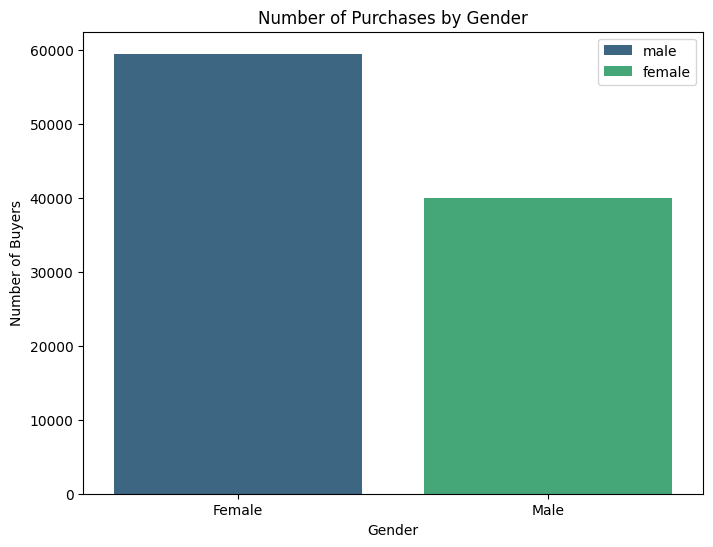

In [61]:
#Total number of purchases based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender',palette='viridis', data=data)
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Buyers')
plt.legend(labels=[],title="",loc="right")
plt.legend(labels=["male","female"],title="",loc="upper right")
plt.show()

<ipython-input-70-70bb2a689a55>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='category', y='price',data=data, palette='viridis')


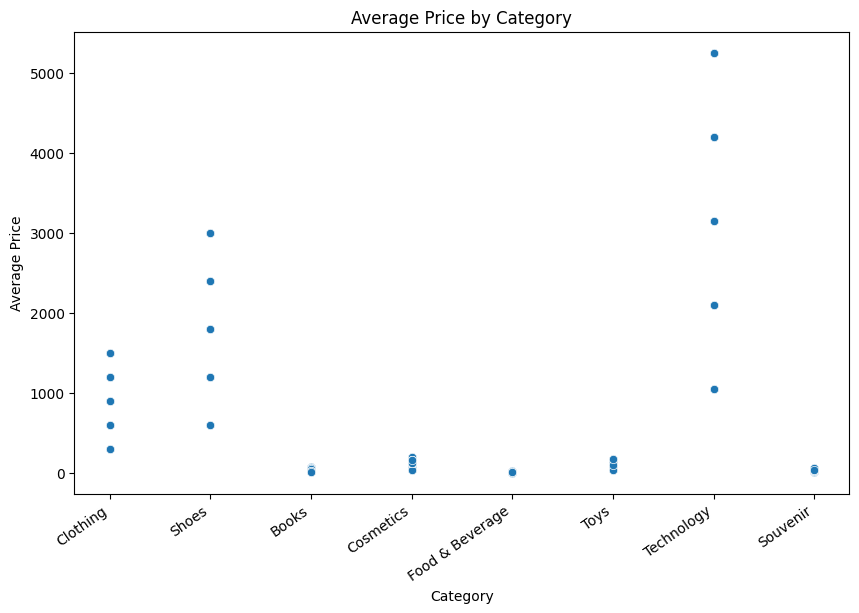

In [70]:
# Average price by category
plt.figure(figsize=(10, 6))
# Removed estimator=np.mean as it's not a valid parameter for scatterplot
sns.scatterplot(x='category', y='price',data=data, palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=35, ha='right')
plt.show()

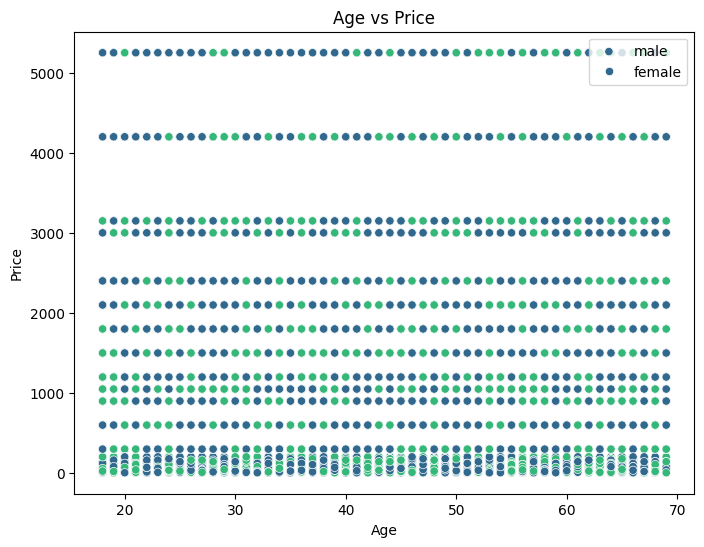

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="price", hue='gender', data=data, palette='viridis')
plt.title("Age vs Price")
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend(labels=["male","female"],title="",loc="upper right")
plt.show()